- https://www.kaggle.com/code/saliblue/bike-demand-multi-model

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Global Variables

In [2]:
import easydict
import json
args = easydict.EasyDict()

# path
args.default_path = '/content/data/MyDrive/google_lecture/05. machine learning/Projects/kaggle/bike_sharing_demand/data/'
args.train_path = args.default_path+'train.csv'
args.test_path = args.default_path+'test.csv'

args.submission_path = args.default_path+'sampleSubmission.csv'
args.submission_file = 'Submission_samples_{0:.5f}.csv'

args.SEED = 42
args.target = 'count'
args.numeric_cols = ['temp', 'atemp','humidity', 'windspeed']
args.category_cols = ['season', 'holiday', 'weather']

args.result_list = []

In [3]:
from google.colab import drive
drive.mount('/content/data')

Mounted at /content/data


# Load data

In [4]:
#Let's Read csv file Train!!!
Bike_T= pd.read_csv(args.train_path)


In [5]:
# See head of the dataset
Bike_T.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
Bike_T.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


# Data Preprocessing

In [7]:
# Check for missing values
Bike_T.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [8]:
# Identifying the unique number of values in the dataset
Bike_T.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

In [9]:
# Viewing the data statistics
Bike_T.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [10]:
# Finding out the correlation between the features
corr = Bike_T.corr()
corr.shape

(11, 11)

<Axes: >

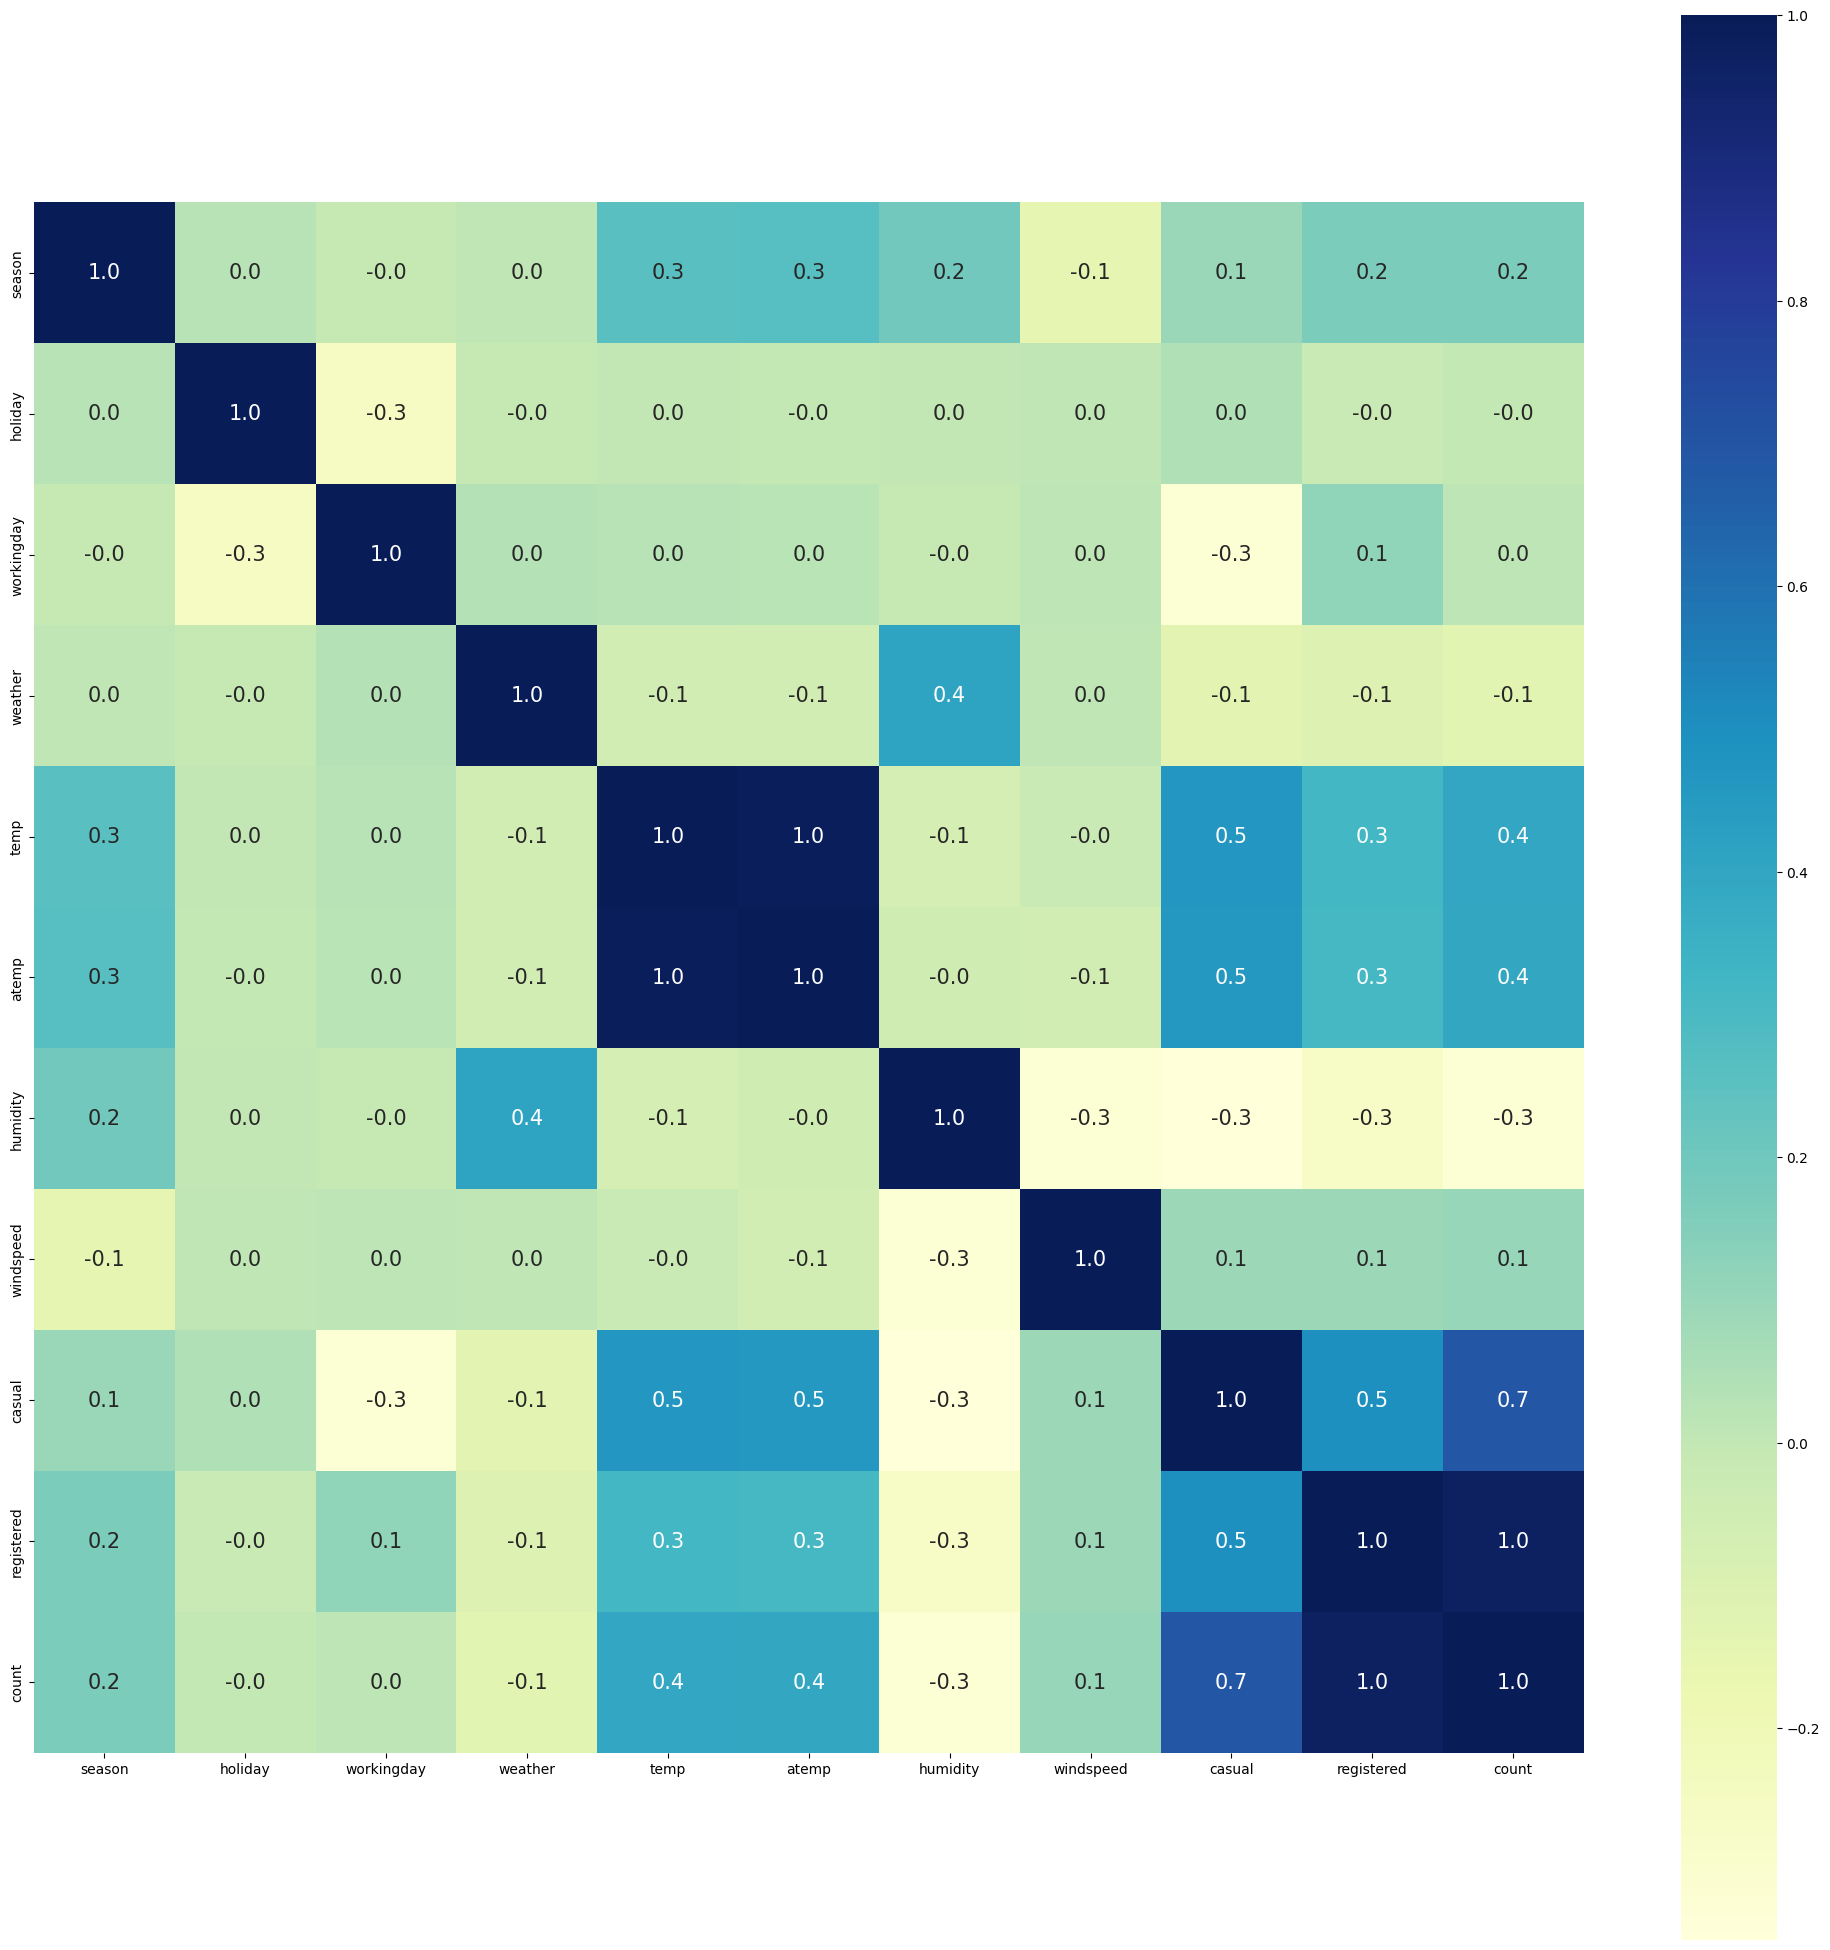

In [11]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(25,25))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='YlGnBu')

In [12]:
pd.crosstab(Bike_T.temp, Bike_T.season, normalize = "index" )

season,1,2,3,4
temp,,,,
0.82,1.000000,0.000000,0.000000,0.000000
1.64,1.000000,0.000000,0.000000,0.000000
2.46,1.000000,0.000000,0.000000,0.000000
3.28,1.000000,0.000000,0.000000,0.000000
4.10,1.000000,0.000000,0.000000,0.000000
4.92,1.000000,0.000000,0.000000,0.000000
5.74,0.981308,0.000000,0.000000,0.018692
6.56,0.910959,0.000000,0.000000,0.089041
7.38,0.896226,0.000000,0.000000,0.103774


In [13]:
pd.crosstab(Bike_T.holiday, Bike_T.season, normalize = "index" )

season,1,2,3,4
holiday,,,,
0,0.247281,0.253901,0.249362,0.249456
1,0.228296,0.154341,0.308682,0.308682


In [14]:
pd.crosstab(Bike_T.workingday, Bike_T.season, normalize = "index" )

season,1,2,3,4
workingday,,,,
0,0.246978,0.241796,0.255613,0.255613
1,0.246627,0.255397,0.248921,0.249056


In [15]:
pd.crosstab(Bike_T.weather, Bike_T.season, normalize = "index" )

season,1,2,3,4
weather,,,,
1,0.244577,0.250417,0.268354,0.236652
2,0.252294,0.249824,0.213126,0.284757
3,0.245634,0.260768,0.231665,0.261932
4,1.000000,0.000000,0.000000,0.000000


## Strorytelling

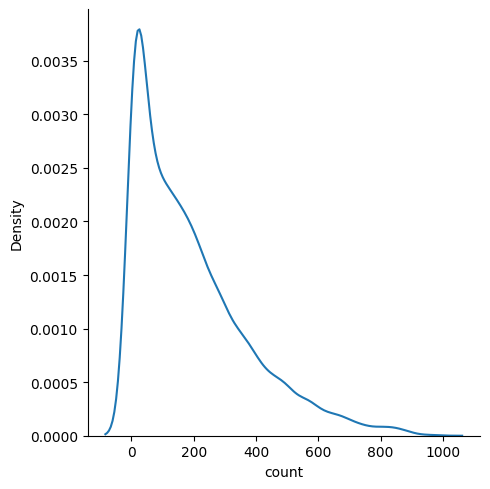

In [16]:
# number of total rentals
sns.displot(Bike_T, x="count",kind="kde")

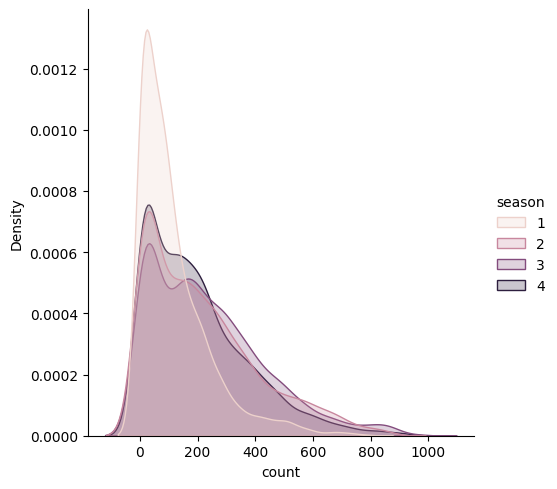

In [17]:
#season - 1 = spring, 2 = summer, 3 = fall, 4 = winter
sns.displot(Bike_T, x="count",hue ='season',kind ='kde', fill="True")

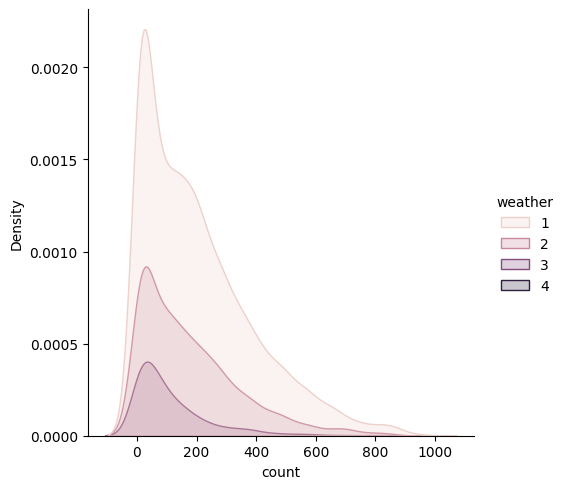

In [18]:
#weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
#          2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#          3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#          4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
sns.displot(Bike_T, x="count",hue ='weather',kind ='kde', fill="True")

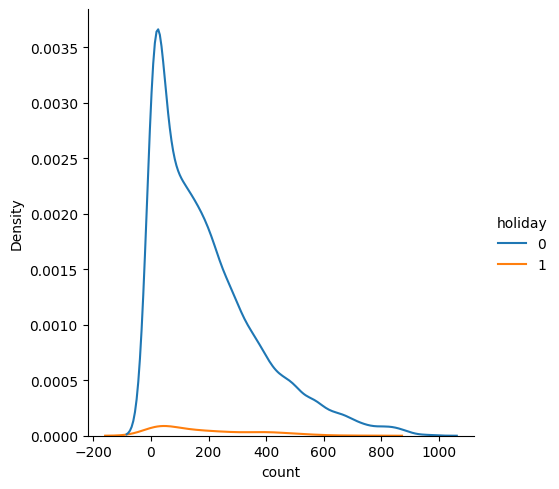

In [19]:
#holiday - whether the day is considered a holiday
sns.displot(Bike_T, x="count",hue ='holiday',kind ='kde')

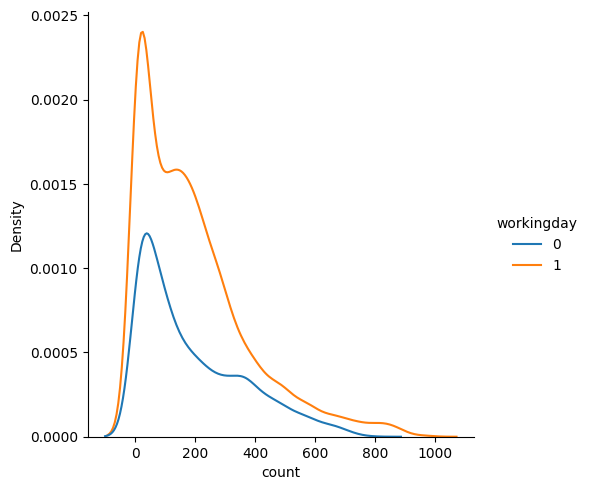

In [20]:
#workingday - whether the day is neither a weekend nor holiday
sns.displot(Bike_T, x="count",hue ='workingday',kind ='kde')

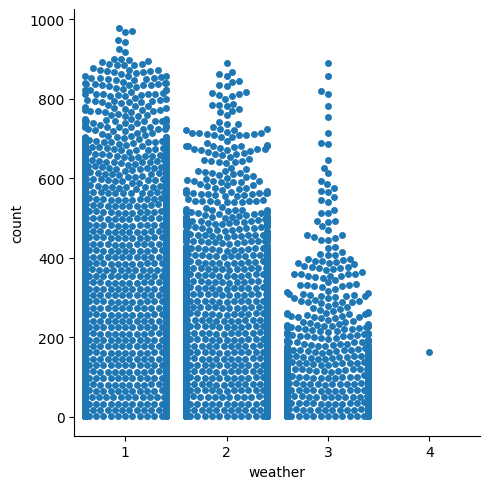

In [21]:
sns.catplot(x="weather", y="count",kind="swarm", data=Bike_T)

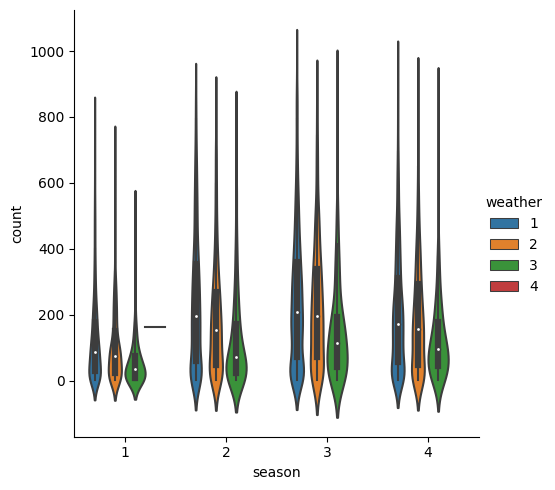

In [22]:
sns.catplot(x="season", y="count",hue ='weather',kind="violin", data=Bike_T)

## Statistical/Relationships

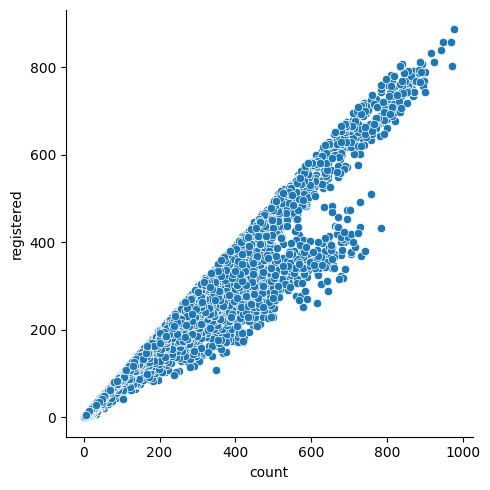

In [23]:
# Strong relationship
sns.relplot(x="count", y="registered", data=Bike_T)

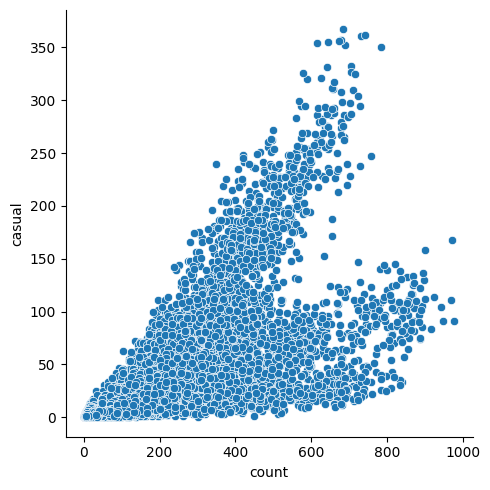

In [24]:
# Strong relationship
sns.relplot(x="count", y="casual", data=Bike_T)

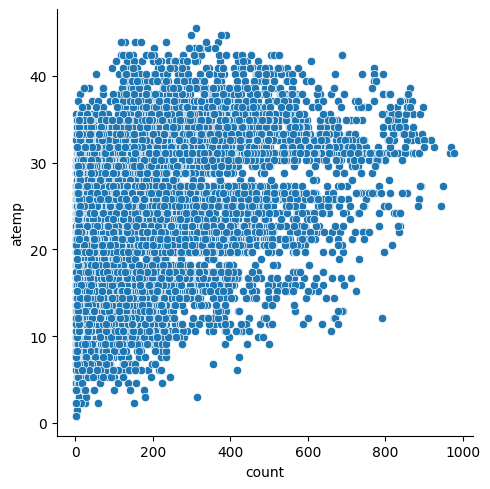

In [25]:
#Good relationship
sns.relplot(x="count", y="atemp", data=Bike_T)

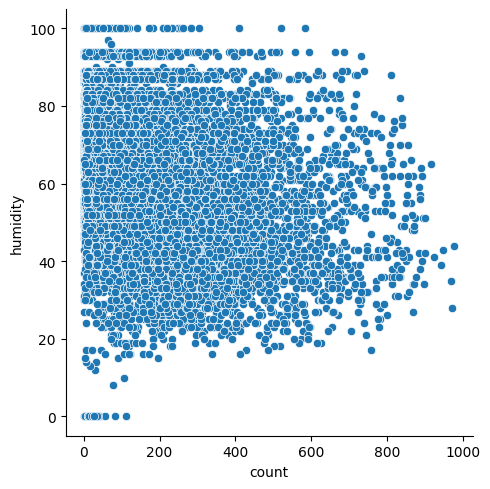

In [26]:
#Poor relationship
sns.relplot(x="count", y="humidity", data=Bike_T)

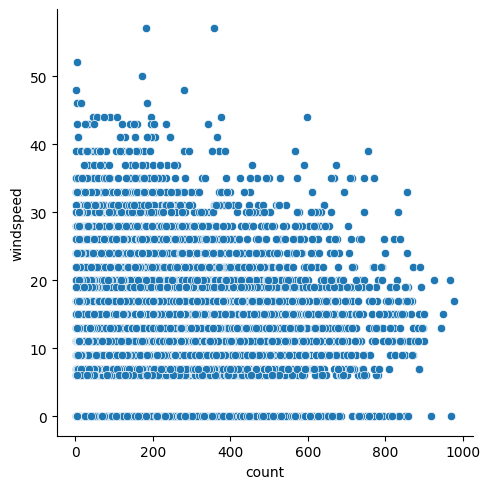

In [27]:
#Poor relationship
sns.relplot(x="count", y="windspeed", data=Bike_T)

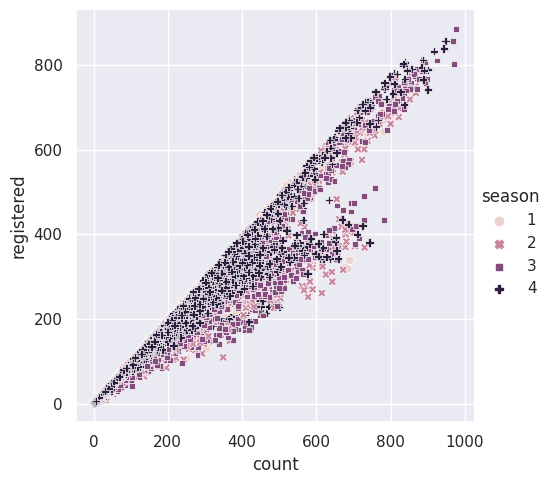

In [28]:
sns.set_theme(style="darkgrid")
sns.relplot(x="count", y="registered", hue="season", style="season", data=Bike_T)

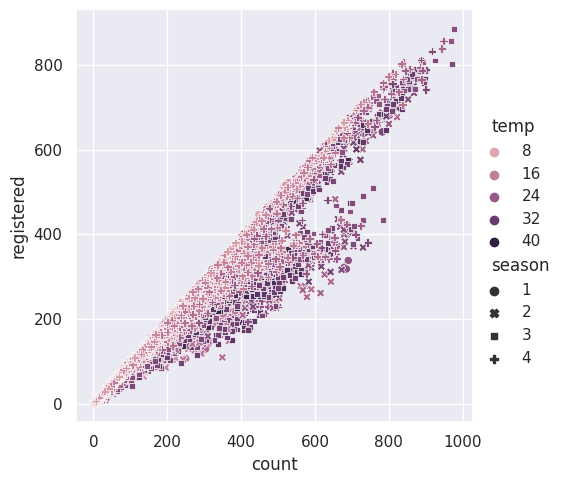

In [29]:
sns.relplot(x="count", y="registered", hue="temp", style="season",data=Bike_T)

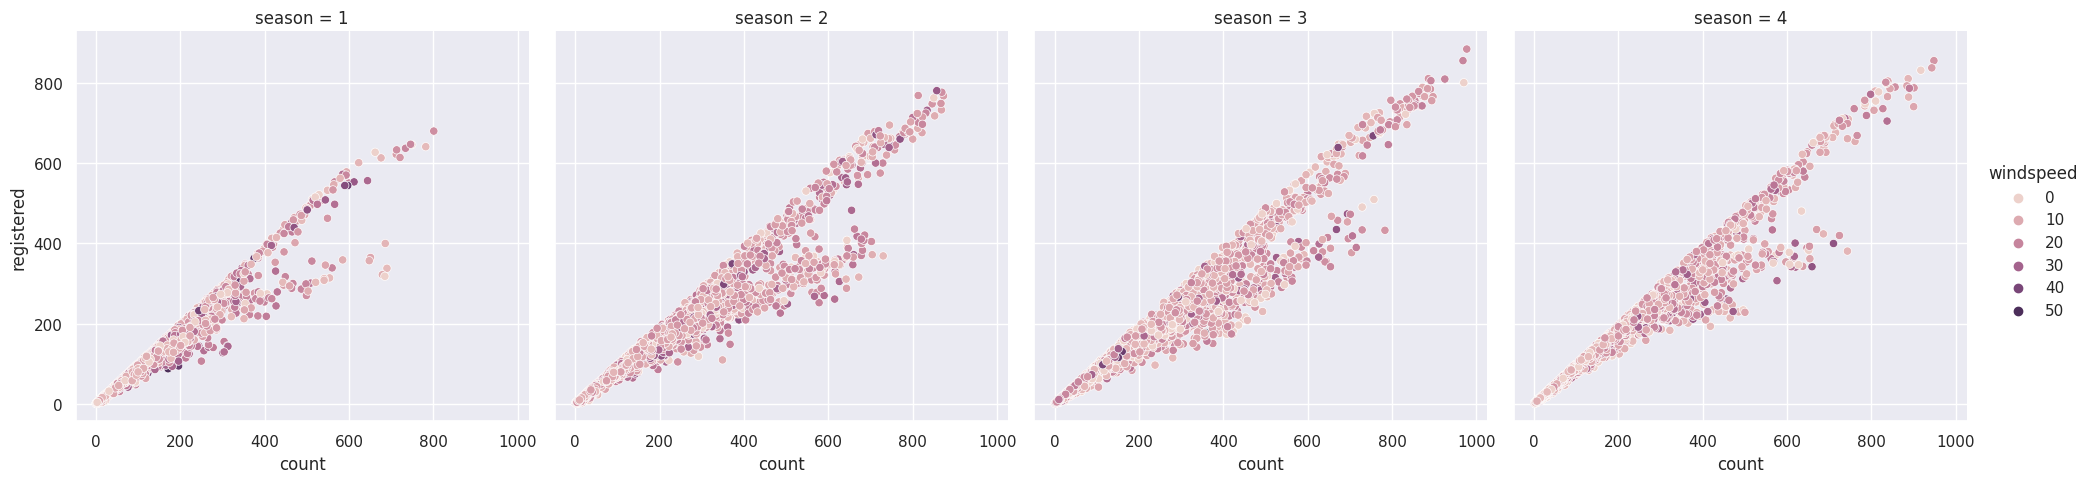

In [30]:
sns.relplot(x="count", y="registered", hue="windspeed", col="season",data=Bike_T)

## Visualizing Regression Models

<Axes: xlabel='count', ylabel='registered'>

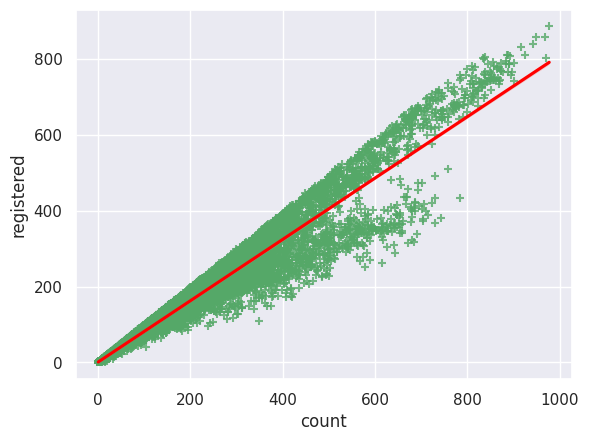

In [31]:
sns.regplot(x="count", y="registered",data=Bike_T,marker="+",scatter_kws={"color": "g"}, line_kws={"color": "red"})

<Axes: xlabel='count', ylabel='casual'>

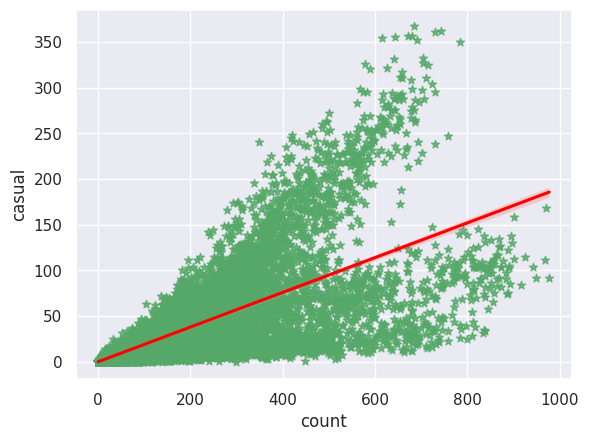

In [32]:
sns.regplot(x="count", y="casual", data=Bike_T,marker="*",scatter_kws={"color": "g"}, line_kws={"color": "red"})

<Axes: xlabel='count', ylabel='atemp'>

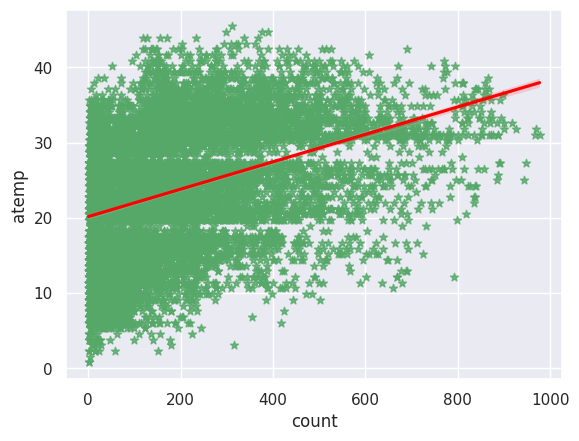

In [33]:
sns.regplot(x="count", y="atemp", data=Bike_T,marker="*",scatter_kws={"color": "g"}, line_kws={"color": "red"})

<Axes: xlabel='count', ylabel='windspeed'>

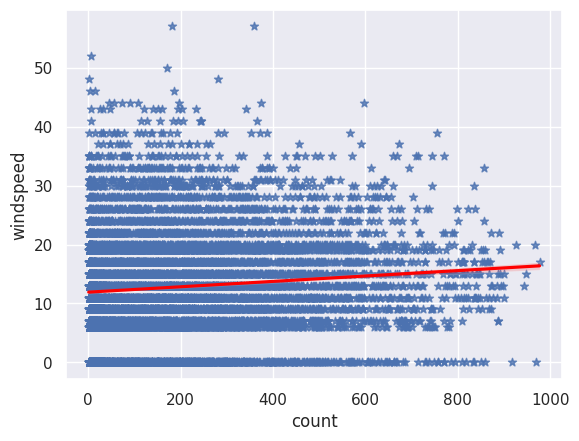

In [34]:
sns.regplot(x="count", y="windspeed", data=Bike_T,marker="*",scatter_kws={"color": "b"}, line_kws={"color": "red"})

<Axes: xlabel='count', ylabel='season'>

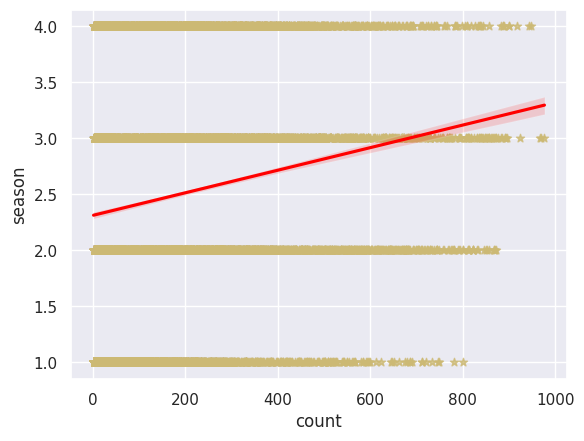

In [35]:
sns.regplot(x="count", y="season", data=Bike_T,marker="*",scatter_kws={"color": "y"}, line_kws={"color": "red"})

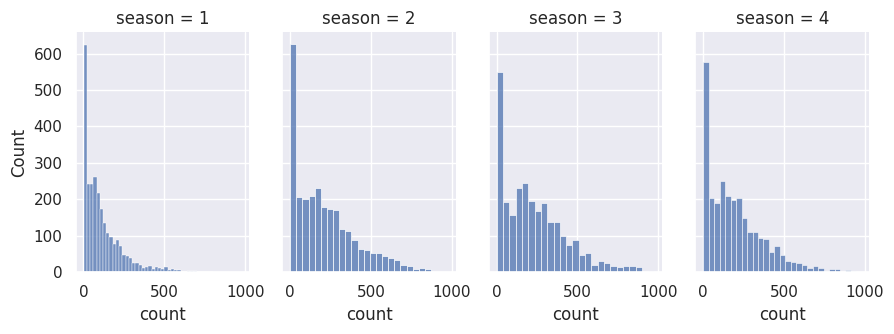

In [36]:
g = sns.FacetGrid(Bike_T, col="season", height=3.5, aspect=.65)
g.map(sns.histplot, "count")

# Train

In [37]:
## Simple Linear Regression (SLR) by registered (Strong relationship )
X = Bike_T[['registered']]
y = Bike_T['count']

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.25, random_state = 4)

## LinearRegression

In [39]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
Simple_LR = LinearRegression()

# Train the model using the training sets

Simple_LR.fit(X_train, y_train)

LinearRegression()

In [40]:
y_pred=Simple_LR.predict(X_test)

<Axes: xlabel='count', ylabel='Count'>

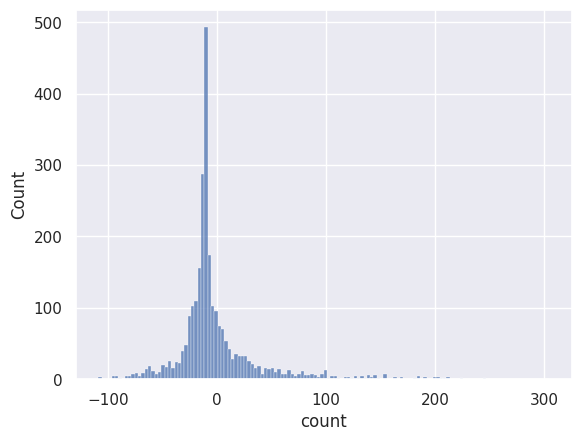

In [41]:
sns.histplot(y_test-y_pred)

In [42]:
from sklearn import metrics
print('R^2:',metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.9412039158437767
Mean Absolute Error: 26.923772635061596
Mean Squared Error: 1975.9526037537164
Root Mean Squared Error: 44.451688424105065


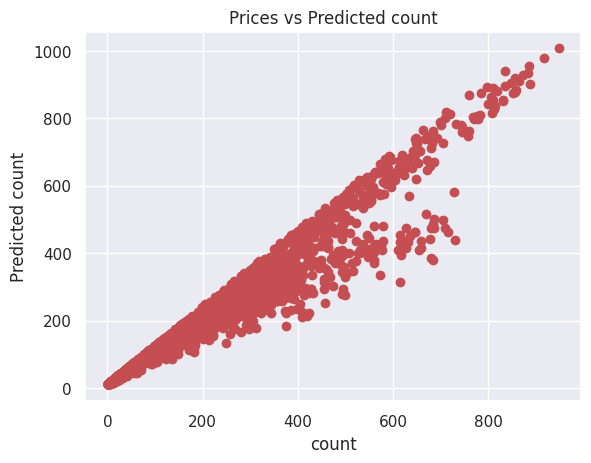

In [43]:
# Visualizing the differences between actual count and predicted count
plt.scatter(y_test, y_pred , color = 'r')
plt.xlabel("count")
plt.ylabel("Predicted count")
plt.title("Prices vs Predicted count")
plt.show()